## This notebook walks us through the process of generating a database of good mazes for training.

This notebook was used to generate the database of training mazes (`training_maze_database.pkl`). For training mazes, all 3 paths between reward ports are the same length, path lengths are between 15-23 hexes, and there are no straight paths >8 hexes long.

In [1]:
# General imports we need
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from tqdm import tqdm

import sys
sys.path.append("..")  # Use sys to add the parent directory (where hex_maze_utils lives) to the path

### Step 1: Generate a bunch of valid maze configurations
We start by using a naive generation approach (randomly generating possible barrier sets until we get a valid maze) to generate 100,000 valid hex maze configurations. We'll store them in a set to remove duplicates.

In [ ]:
from hex_maze_utils import generate_good_maze

run = False # Don't run this by default because it'll take forever and prevent future cells from being run
if run:

    # Initialize a set to store all of the unique maze configurations we generate
    valid_maze_configs = set()

    # Initialize a list to track how many unique configurations we have after
    # every 100 configurations we randomly generate. Watching this list reach an 
    # asymptote will give us info on how many unique configurations exist
    number_of_valid_configs = []

    # Generate 100,000 valid mazes
    num_mazes_to_generate = 1000

    for i in tqdm(range(1, num_mazes_to_generate+1)):
        # Randomly generate a valid maze configuration
        maze = frozenset(generate_good_maze(num_barriers=5, training_maze=True))
        
        # Add the valid maze config to our set (this automatically removes any duplicates)
        valid_maze_configs.add(maze)
        
        # For every 100 configurations we generate, record how many are unique
        if i % 100 == 0: 
            num_valid = len(valid_maze_configs)
            number_of_valid_configs.append(num_valid)
            print(f"After {i} good mazes, {num_valid} are unique.")

            # Incrementally save the configs and now many are unique so far
            with open('example_data/valid_training_maze_configs.pkl', 'wb') as file:
                pickle.dump(valid_maze_configs, file)
            with open('example_data/number_of_valid_training_configs.pkl', 'wb') as file:
                pickle.dump(number_of_valid_configs, file)

 10%|█         | 104/1000 [00:07<01:03, 14.15it/s]

After 100 good mazes, 94 are unique.


 20%|██        | 200/1000 [00:15<01:03, 12.51it/s]

After 200 good mazes, 182 are unique.


 31%|███▏      | 313/1000 [00:24<01:06, 10.38it/s]

After 300 good mazes, 265 are unique.


 40%|████      | 402/1000 [00:32<01:00,  9.88it/s]

After 400 good mazes, 344 are unique.


 50%|█████     | 505/1000 [00:41<00:39, 12.48it/s]

After 500 good mazes, 410 are unique.


 60%|██████    | 604/1000 [00:50<00:36, 10.95it/s]

After 600 good mazes, 475 are unique.


 70%|███████   | 701/1000 [00:59<00:33,  9.03it/s]

After 700 good mazes, 531 are unique.


 80%|████████  | 803/1000 [01:07<00:09, 19.87it/s]

After 800 good mazes, 584 are unique.


 90%|█████████ | 901/1000 [01:17<00:10,  9.27it/s]

After 900 good mazes, 628 are unique.


100%|██████████| 1000/1000 [01:25<00:00, 11.74it/s]

After 1000 good mazes, 669 are unique.


We may realize that we didn't actually generate enough configurations to get all possible unique mazes. Here's the another version of the above cell but now we're loading our existing set and adding to that instead of starting from scratch.

In [ ]:
from hex_maze_utils import generate_good_maze

run = False # Don't run this by default because it'll take forever and prevent future cells from being run
if run:

    # Load our saved set of all unique maze configurations we've generated so far
    with open('example_data/valid_training_maze_configs.pkl', 'rb') as file:
        valid_maze_configs = pickle.load(file)

    # Load our saved list tracking how many unique configurations we have for
    # every 100 configurations we randomly generate.
    with open('example_data/number_of_valid_training_configs.pkl', 'rb') as file:
        number_of_valid_configs = pickle.load(file)

    # Calculate how many mazes we've already generated based on the length of our saved list
    num_mazes_generated = len(number_of_valid_configs)*100

    # Generate another 10000 valid mazes
    num_mazes_to_generate = 10000

    for i in tqdm(range(1, num_mazes_to_generate+1)):
        # Randomly generate a valid maze configuration (first a bunch using 5 barriers, then 6) 
        maze = frozenset(generate_good_maze(num_barriers=6, training_maze=True))
        
        # Add the valid maze config to our set (this automatically removes any duplicates)
        valid_maze_configs.add(maze)
        
        # For every 100 configurations we generate, record how many are unique
        if i % 100 == 0: 
            num_valid = len(valid_maze_configs)
            number_of_valid_configs.append(num_valid)
            print(f"After {num_mazes_generated+i} good mazes, {num_valid} are unique.")

            # Incrementally save the configs and now many are unique so far
            with open('example_data/valid_training_maze_configs.pkl', 'wb') as file:
                pickle.dump(valid_maze_configs, file)
            with open('example_data/number_of_valid_training_configs.pkl', 'wb') as file:
                pickle.dump(number_of_valid_configs, file)

  1%|          | 101/10000 [00:05<07:39, 21.53it/s]

After 17100 good mazes, 8304 are unique.


  2%|▏         | 204/10000 [00:11<09:19, 17.51it/s]

After 17200 good mazes, 8331 are unique.


  3%|▎         | 304/10000 [00:17<10:00, 16.15it/s]

After 17300 good mazes, 8366 are unique.


  4%|▍         | 402/10000 [00:22<09:22, 17.08it/s]

After 17400 good mazes, 8406 are unique.


  5%|▌         | 502/10000 [00:27<07:52, 20.12it/s]

After 17500 good mazes, 8438 are unique.


  6%|▌         | 602/10000 [00:33<08:43, 17.94it/s]

After 17600 good mazes, 8470 are unique.


  7%|▋         | 704/10000 [00:39<09:17, 16.68it/s]

After 17700 good mazes, 8495 are unique.


  8%|▊         | 802/10000 [00:45<08:20, 18.38it/s]

After 17800 good mazes, 8519 are unique.


  9%|▉         | 900/10000 [00:50<08:12, 18.46it/s]

After 17900 good mazes, 8551 are unique.


 10%|█         | 1002/10000 [00:55<09:05, 16.51it/s]

After 18000 good mazes, 8577 are unique.


 11%|█         | 1105/10000 [01:01<09:14, 16.04it/s]

After 18100 good mazes, 8607 are unique.


 12%|█▏        | 1201/10000 [01:06<07:26, 19.72it/s]

After 18200 good mazes, 8630 are unique.


 13%|█▎        | 1306/10000 [01:11<05:50, 24.81it/s]

After 18300 good mazes, 8657 are unique.


 14%|█▍        | 1398/10000 [01:16<07:06, 20.15it/s]

After 18400 good mazes, 8690 are unique.


 15%|█▌        | 1504/10000 [01:22<06:41, 21.14it/s]

After 18500 good mazes, 8720 are unique.


 16%|█▌        | 1603/10000 [01:27<06:50, 20.47it/s]

After 18600 good mazes, 8748 are unique.


 17%|█▋        | 1703/10000 [01:32<07:12, 19.20it/s]

After 18700 good mazes, 8770 are unique.


 18%|█▊        | 1800/10000 [01:37<08:15, 16.54it/s]

After 18800 good mazes, 8792 are unique.


 19%|█▉        | 1902/10000 [01:42<13:11, 10.24it/s]

After 18900 good mazes, 8824 are unique.


 20%|██        | 2000/10000 [01:47<06:18, 21.14it/s]

After 19000 good mazes, 8844 are unique.


 21%|██        | 2099/10000 [01:53<07:03, 18.66it/s]

After 19100 good mazes, 8870 are unique.


 22%|██▏       | 2203/10000 [01:59<05:54, 22.00it/s]

After 19200 good mazes, 8895 are unique.


 23%|██▎       | 2303/10000 [02:04<06:33, 19.58it/s]

After 19300 good mazes, 8919 are unique.


 24%|██▍       | 2401/10000 [02:10<06:50, 18.52it/s]

After 19400 good mazes, 8939 are unique.


 25%|██▌       | 2501/10000 [02:16<11:52, 10.53it/s]

After 19500 good mazes, 8968 are unique.


 26%|██▌       | 2600/10000 [02:22<06:41, 18.45it/s]

After 19600 good mazes, 8987 are unique.


 27%|██▋       | 2700/10000 [02:27<07:00, 17.35it/s]

After 19700 good mazes, 9007 are unique.


 28%|██▊       | 2800/10000 [02:34<08:53, 13.49it/s]

After 19800 good mazes, 9036 are unique.


 29%|██▉       | 2902/10000 [02:40<08:01, 14.73it/s]

After 19900 good mazes, 9052 are unique.


 30%|███       | 3002/10000 [02:46<08:09, 14.30it/s]

After 20000 good mazes, 9075 are unique.


 31%|███       | 3101/10000 [02:52<09:49, 11.69it/s]

After 20100 good mazes, 9103 are unique.


 32%|███▏      | 3204/10000 [02:57<05:11, 21.85it/s]

After 20200 good mazes, 9124 are unique.


 33%|███▎      | 3301/10000 [03:02<06:11, 18.02it/s]

After 20300 good mazes, 9153 are unique.


 34%|███▍      | 3400/10000 [03:07<06:26, 17.09it/s]

After 20400 good mazes, 9175 are unique.


 35%|███▌      | 3502/10000 [03:11<05:30, 19.67it/s]

After 20500 good mazes, 9196 are unique.


 36%|███▌      | 3600/10000 [03:17<09:26, 11.30it/s]

After 20600 good mazes, 9221 are unique.


 37%|███▋      | 3699/10000 [03:22<05:08, 20.44it/s]

After 20700 good mazes, 9240 are unique.


 38%|███▊      | 3800/10000 [03:29<06:02, 17.09it/s]

After 20800 good mazes, 9269 are unique.


 39%|███▉      | 3904/10000 [03:35<05:32, 18.33it/s]

After 20900 good mazes, 9292 are unique.


 40%|████      | 4002/10000 [03:40<06:30, 15.35it/s]

After 21000 good mazes, 9315 are unique.


 41%|████      | 4102/10000 [03:44<06:05, 16.12it/s]

After 21100 good mazes, 9339 are unique.


 42%|████▏     | 4202/10000 [03:50<07:20, 13.15it/s]

After 21200 good mazes, 9361 are unique.


 43%|████▎     | 4303/10000 [03:56<05:06, 18.61it/s]

After 21300 good mazes, 9392 are unique.


 44%|████▍     | 4401/10000 [04:02<06:17, 14.82it/s]

After 21400 good mazes, 9413 are unique.


 45%|████▌     | 4500/10000 [04:08<07:45, 11.82it/s]

After 21500 good mazes, 9431 are unique.


 46%|████▌     | 4601/10000 [04:14<05:42, 15.78it/s]

After 21600 good mazes, 9452 are unique.


 47%|████▋     | 4698/10000 [04:18<03:03, 28.88it/s]

After 21700 good mazes, 9480 are unique.


 48%|████▊     | 4804/10000 [04:25<05:07, 16.92it/s]

After 21800 good mazes, 9498 are unique.


 49%|████▉     | 4900/10000 [04:31<06:39, 12.75it/s]

After 21900 good mazes, 9522 are unique.


 50%|█████     | 5000/10000 [04:36<03:59, 20.86it/s]

After 22000 good mazes, 9543 are unique.


 51%|█████     | 5105/10000 [04:40<03:00, 27.13it/s]

After 22100 good mazes, 9563 are unique.


 52%|█████▏    | 5207/10000 [04:46<03:25, 23.29it/s]

After 22200 good mazes, 9577 are unique.


 53%|█████▎    | 5304/10000 [04:52<04:49, 16.20it/s]

After 22300 good mazes, 9600 are unique.


 54%|█████▍    | 5401/10000 [04:57<05:34, 13.74it/s]

After 22400 good mazes, 9616 are unique.


 55%|█████▌    | 5502/10000 [05:02<05:18, 14.12it/s]

After 22500 good mazes, 9641 are unique.


 56%|█████▌    | 5603/10000 [05:07<03:33, 20.57it/s]

After 22600 good mazes, 9664 are unique.


 57%|█████▋    | 5704/10000 [05:13<02:59, 23.93it/s]

After 22700 good mazes, 9678 are unique.


 58%|█████▊    | 5803/10000 [05:18<04:22, 16.01it/s]

After 22800 good mazes, 9694 are unique.


 59%|█████▉    | 5900/10000 [05:24<04:35, 14.90it/s]

After 22900 good mazes, 9711 are unique.


 60%|██████    | 6007/10000 [05:30<02:41, 24.80it/s]

After 23000 good mazes, 9729 are unique.


 61%|██████    | 6103/10000 [05:34<02:31, 25.66it/s]

After 23100 good mazes, 9751 are unique.


 62%|██████▏   | 6201/10000 [05:40<02:51, 22.12it/s]

After 23200 good mazes, 9770 are unique.


 63%|██████▎   | 6300/10000 [05:45<03:27, 17.81it/s]

After 23300 good mazes, 9788 are unique.


 64%|██████▍   | 6402/10000 [05:51<03:46, 15.91it/s]

After 23400 good mazes, 9804 are unique.


 65%|██████▌   | 6506/10000 [05:57<04:56, 11.78it/s]

After 23500 good mazes, 9824 are unique.


 66%|██████▌   | 6603/10000 [06:03<02:54, 19.44it/s]

After 23600 good mazes, 9841 are unique.


 67%|██████▋   | 6703/10000 [06:08<04:14, 12.94it/s]

After 23700 good mazes, 9857 are unique.


 68%|██████▊   | 6802/10000 [06:13<03:14, 16.42it/s]

After 23800 good mazes, 9871 are unique.


 69%|██████▉   | 6904/10000 [06:17<02:37, 19.63it/s]

After 23900 good mazes, 9886 are unique.


 70%|███████   | 7000/10000 [06:23<02:28, 20.24it/s]

After 24000 good mazes, 9904 are unique.


 71%|███████   | 7108/10000 [06:29<01:45, 27.45it/s]

After 24100 good mazes, 9917 are unique.


 72%|███████▏  | 7200/10000 [06:34<03:13, 14.49it/s]

After 24200 good mazes, 9927 are unique.


 73%|███████▎  | 7300/10000 [06:40<02:40, 16.81it/s]

After 24300 good mazes, 9943 are unique.


 74%|███████▍  | 7405/10000 [06:45<02:12, 19.54it/s]

After 24400 good mazes, 9961 are unique.


 75%|███████▌  | 7502/10000 [06:50<02:37, 15.89it/s]

After 24500 good mazes, 9973 are unique.


 76%|███████▌  | 7599/10000 [06:54<01:58, 20.27it/s]

After 24600 good mazes, 9992 are unique.


 77%|███████▋  | 7703/10000 [07:00<02:00, 19.00it/s]

After 24700 good mazes, 10006 are unique.


 78%|███████▊  | 7800/10000 [07:06<02:00, 18.28it/s]

After 24800 good mazes, 10019 are unique.


 79%|███████▉  | 7909/10000 [07:11<01:54, 18.20it/s]

After 24900 good mazes, 10034 are unique.


 80%|████████  | 8003/10000 [07:17<01:32, 21.63it/s]

After 25000 good mazes, 10055 are unique.


 81%|████████  | 8101/10000 [07:22<02:15, 14.03it/s]

After 25100 good mazes, 10068 are unique.


 82%|████████▏ | 8202/10000 [07:28<01:56, 15.43it/s]

After 25200 good mazes, 10081 are unique.


 83%|████████▎ | 8300/10000 [07:33<01:42, 16.63it/s]

After 25300 good mazes, 10100 are unique.


 84%|████████▍ | 8400/10000 [07:38<01:43, 15.50it/s]

After 25400 good mazes, 10112 are unique.


 85%|████████▌ | 8500/10000 [07:44<01:37, 15.32it/s]

After 25500 good mazes, 10132 are unique.


 86%|████████▌ | 8600/10000 [07:49<02:00, 11.59it/s]

After 25600 good mazes, 10149 are unique.


 87%|████████▋ | 8702/10000 [07:55<01:45, 12.36it/s]

After 25700 good mazes, 10162 are unique.


 88%|████████▊ | 8801/10000 [08:00<00:56, 21.21it/s]

After 25800 good mazes, 10179 are unique.


 89%|████████▉ | 8905/10000 [08:06<01:02, 17.52it/s]

After 25900 good mazes, 10185 are unique.


 90%|█████████ | 9006/10000 [08:12<00:42, 23.64it/s]

After 26000 good mazes, 10196 are unique.


 91%|█████████ | 9100/10000 [08:17<00:46, 19.29it/s]

After 26100 good mazes, 10211 are unique.


 92%|█████████▏| 9202/10000 [08:23<00:55, 14.36it/s]

After 26200 good mazes, 10219 are unique.


 93%|█████████▎| 9302/10000 [08:28<00:54, 12.79it/s]

After 26300 good mazes, 10231 are unique.


 94%|█████████▍| 9406/10000 [08:33<00:26, 22.49it/s]

After 26400 good mazes, 10250 are unique.


 95%|█████████▌| 9502/10000 [08:38<00:30, 16.30it/s]

After 26500 good mazes, 10260 are unique.


 96%|█████████▌| 9605/10000 [08:43<00:18, 21.15it/s]

After 26600 good mazes, 10278 are unique.


 97%|█████████▋| 9700/10000 [08:48<00:16, 18.11it/s]

After 26700 good mazes, 10287 are unique.


 98%|█████████▊| 9804/10000 [08:54<00:11, 17.04it/s]

After 26800 good mazes, 10303 are unique.


 99%|█████████▉| 9897/10000 [08:58<00:03, 26.70it/s]

After 26900 good mazes, 10319 are unique.


100%|██████████| 10000/10000 [09:04<00:00, 18.37it/s]

After 27000 good mazes, 10336 are unique.


Now let's use the stats we kept track of during the maze generation process (how many unique mazes we have after every 100 valid mazes we randomly generate) to estimate how many unique maze configurations there are.

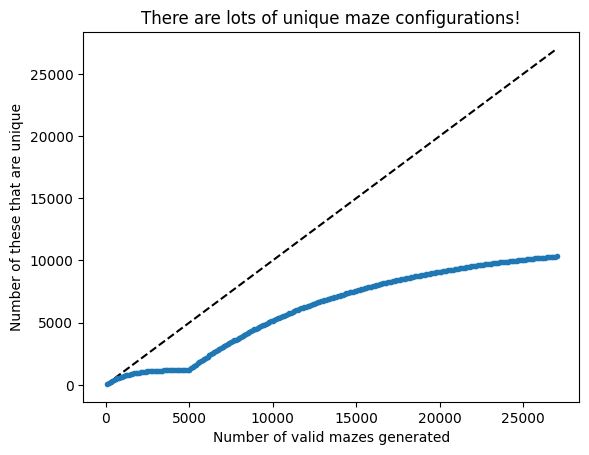

In [2]:
# Load our saved list tracking how many unique configurations we have for
# every 100 configurations we randomly generate.
with open('example_data/number_of_valid_training_configs.pkl', 'rb') as file:
    num_valid_configs = pickle.load(file)

# Set up our x axis (we recorded the number of unique configs after every 100 tries)
num_tries = list(range(100, (len(num_valid_configs)+1)*100, 100))

# Plot a unity line for comparison (if all mazes we generated were unique, our data should look like this)
plt.plot([0, num_tries [-1]], [0, num_tries[-1]], 'k--')

# Plot how many mazes we actually get
plt.plot(num_tries, num_valid_configs, '.')
plt.xlabel("Number of valid mazes generated")
plt.ylabel("Number of these that are unique")
plt.title("There are lots of unique maze configurations!")
plt.show()


Great! It looks like we're beginning to reach an asymptote. 

(The 2 bumps are because we first started generating using 5 barriers, and then switched to 6)

But we want all possible maze configurations are in our database. If we keep randomly generating configurations and hoping they are unique, this could take a really long time.

We can fill in the rest of the database by taking advantage of the fact that each maze has 5 other associated barrier sets that have the same graph structure (corresponding to the maze rotated clockwise/counterclockwise and reflected across its 3 axes of symmetry). In other words, each maze has 5 other mazes that it is isomorphic to/mazes can be divided into groups of 6 that are isomorphic. Based on the asymptote we see above, it seems likely that at least 1 of the 6  possible configurations for each group of isomorphic mazes exists in our set.

Let's see if this is true.

In [3]:
from hex_maze_utils import num_isomorphic_mazes_in_set

# Load our saved set of valid maze configurations
with open('example_data/valid_training_maze_configs.pkl', 'rb') as file:
    valid_mazes = pickle.load(file)

print(f"We have {len(valid_mazes)} unique maze configurations in our set.")

# Set up a list tracking the number of isomorphic mazes present for each maze 
# in the set of valid mazes. This will help us confirm our hypothesis that each 
# maze already has a number of isomorphic mazes present in our set
num_isomorphic_mazes_for_this_maze = []

# Initialize a set for all valid maze configurations that don't yet exist in our set
valid_mazes_not_in_set = set()

print("Checking how many isomorphic mazes exist for each maze in the set (and how many are missing) ... ")
for maze in tqdm(valid_mazes):
    # For each maze in our set, find all isomorphic mazes for this configuration that 
    # already exist in our larger set, and which (if any) are missing.
    num_iso_mazes, missing_mazes = num_isomorphic_mazes_in_set(valid_mazes, maze)
    
    # Record how many isomorphic mazes this maze has in the set
    num_isomorphic_mazes_for_this_maze.append(num_iso_mazes)
    
    # If we found valid maze configurations that don't yet exist in our larger set, add them here
    for maze in missing_mazes:
        valid_mazes_not_in_set.add(maze)
        
print(f"We found {len(valid_mazes_not_in_set)} unique maze configurations not in our original set.")

We have 10336 unique maze configurations in our set.
Checking how many isomorphic mazes exist for each maze in the set (and how many are missing) ... 


100%|██████████| 10336/10336 [00:02<00:00, 3852.07it/s]

We found 1218 unique maze configurations not in our original set.


Using this data, we can plot a histogram of how many isomorphic mazes exist for each maze in our set.

If most mazes have 4 or 5, it seems fairly likely that our set contains at least one maze for each set of 6 isomorphic mazes (meaning we can complete our set simply by adding these missing isomorphic mazes). 

If we have a lot of mazes with only 0-2 isomorphic mazes in the set, it is possible we are missing some entire groups of isomorphic mazes (meaning we should go back and generate some more mazes to make sure we get them all).

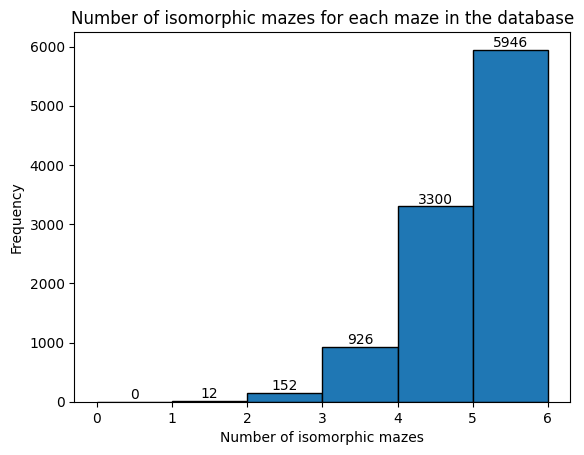

In [4]:
bin_edges = range(7)  # A maze could have 0, 1, 2, 3, 4, or 5 isomorphic mazes in the set

# Plot histogram of how many isomorphic mazes exist in the database for each maze
n, bins, patches = plt.hist(num_isomorphic_mazes_for_this_maze, bins=bin_edges, edgecolor='black')

# Add title and labels
bin_centers = 0.5 * (bins[:-1] + bins[1:])
for count, x in zip(n, bin_centers):
    plt.text(x, count, str(int(count)), ha='center', va='bottom')
#plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5], [0, 1, 2, 3, 4, 5])
plt.title('Number of isomorphic mazes for each maze in the database')
plt.xlabel('Number of isomorphic mazes')
plt.ylabel('Frequency')
plt.show()

This looks pretty good! Most of the isomorphic mazes for each maze are already in the set. 

By adding the few that we missed, our set should be (at least close to) complete.

### Step 2: Complete the set by ensuring all isomorphic maze configurations are present

In [5]:
# Now let's create a combined database with (hopefully) all possible hex maze configurations

print(f"We had {len(valid_mazes)} unique maze configurations in our set.")
print(f"We found {len(valid_mazes_not_in_set)} unique maze configurations not in our original set.")

# Add the newly generated mazes to our set
valid_mazes.update(valid_mazes_not_in_set)

print(f"We now have {len(valid_mazes)} unique maze configurations in our set.")

save = False # be warned that saving will overwrite already saved files of the same name
# (I have added _DUPLICATE at the end of the file name as an extra check to prevent this)

if save:
    # Save our combined set of valid maze configurations to a pickle file
    with open('example_data/all_valid_training_maze_configs_DUPLICATE.pkl', 'wb') as file:
        pickle.dump(valid_mazes, file) 

We had 10336 unique maze configurations in our set.
We found 1218 unique maze configurations not in our original set.
We now have 11554 unique maze configurations in our set.


### Step 3: Store these in a database with attributes for each maze

Now that we have a bunch of valid training maze configurations, how do we choose which one(s) to use?

Depending on what we are trying to test, we may want mazes with certain path lengths between reward ports, certain numbers of choice points, etc. We'll calculate all of these attributes (and more!) for each maze and store them alongside the maze in the database, so it's easy to search for the exact kind of mazes we want.

In [6]:
from hex_maze_utils import get_maze_attributes

# Load our saved set of all valid maze configurations
with open('example_data/all_valid_training_maze_configs.pkl', 'rb') as file:
    all_valid_mazes = pickle.load(file)
    
# Convert it to a list so we can iterate
all_mazes = list(all_valid_mazes)
print(f"We have {len(all_mazes)} maze configurations to add to our database.")

maze_dicts = []
# Calculate info for each maze and add it to our dictionary
for maze in tqdm(all_mazes):
    maze_attributes = get_maze_attributes(maze)
    maze_dicts.append(maze_attributes)

# Create DataFrame
maze_configuration_database = pd.DataFrame(maze_dicts)

print("Here is our database!")
display(maze_configuration_database)

We have 11554 maze configurations to add to our database.


100%|██████████| 11554/11554 [00:04<00:00, 2758.43it/s]


Here is our database!


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"{34, 18, 9, 11, 45, 31}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 23, 28, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 5, 7, 10, 13, 17, 21, 26, 22, 27, 32, ...","{48, 49, 13}",3,"[[33, 28, 23, 19, 24, 29, 35, 40, 44, 39, 43, ...",7,"{(18, 37, 23, 44, 13, 15), (29, 37, 9, 11, 45,..."
1,"{36, 39, 8, 11, 31, 15}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 24, 19, 23, 28, ...","[[2, 49, 47, 42, 46, 41, 45, 40, 35, 29, 34, 2...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","{49, 29, 7, 28, 13}",5,"[[37, 32, 38, 49, 47, 42], [30, 25, 21, 26, 22...",7,"{(32, 17, 45, 23, 28, 13), (18, 35, 7, 9, 42, ..."
2,"{36, 20, 21, 11, 44, 28}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","[[1, 4, 5, 7, 9, 12, 15, 19, 24, 29, 34, 39, 4...","[[2, 49, 47, 42, 46, 41, 45, 40, 35, 29, 34, 3...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","{49, 4, 29, 7}",4,"[[37, 32, 38, 49, 47, 42], [37, 31, 26, 22, 27...",5,"{(20, 7, 26, 11, 44, 30), (30, 21, 24, 8, 9, 4..."
3,"{35, 20, 23, 10, 27, 46}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 32, ...","[[1, 4, 5, 7, 9, 12, 15, 19, 24, 29, 34, 28, 3...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 32, ...","{48, 4, 39, 31}",4,"[[31, 26, 21, 25, 30, 36], [17, 14, 18, 22, 26...",6,"{(17, 34, 20, 9, 27, 46), (37, 24, 9, 11, 44, ..."
4,"{20, 9, 11, 45, 25, 31}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","[[1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 23, 28, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 29, 34, 2...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","{48, 49, 28, 13}",4,"[[34, 29, 35, 40, 44, 39], [34, 28, 23, 19, 24...",7,"{(18, 20, 23, 25, 44, 31), (21, 25, 27, 29, 46..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11549,"{16, 18, 20, 37, 23, 39}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 5, 7, 9, 12, 15, 19, 24, 29, 34, 28, 3...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 29, 34, 2...","[[1, 4, 5, 7, 10, 13, 17, 21, 26, 22, 27, 32, ...","{49, 4, 29, 7}",4,"[[36, 31, 26, 22, 27, 32, 38, 49, 47, 42, 46, ...",6,"{(17, 34, 21, 42, 27, 15), (20, 37, 8, 9, 45, ..."
11550,"{18, 19, 37, 40, 13}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 29, 34, 28, 3...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 29, 34, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","{49, 4, 29}",3,"[[33, 28, 34, 39, 43, 48], [31, 26, 22, 27, 32...",6,"{(18, 19, 40, 10, 31), (22, 41, 10, 29, 15), (..."
11551,"{32, 13, 18, 28, 45, 46}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 42, ...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 29, 34, 39, 4...","[[2, 49, 47, 42, 37, 31, 36, 30, 35, 29, 34, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 42, ...","{39, 4, 29, 31}",4,"[[34, 29, 35, 40, 44, 39], [20, 16, 12, 15, 19...",6,"{(18, 39, 8, 9, 31, 15), (18, 29, 7, 42, 27, 4..."
11552,"{29, 21, 7, 9, 11, 45}",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 10, 13, 17, 14, 18, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 23, 28, ...","[[2, 49, 38, 32, 37, 31, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 10, 13, 17, 14, 18, 22, 27, 32, ...","{32, 49, 48, 13}",4,"[[37, 32, 38, 49, 47, 42], [31, 26, 22, 27, 32...",7,"{(32, 30, 27, 13, 46, 15), (20, 8, 9, 11, 45, ..."


Let's save our database for later use. Now that the database has been created, we can just load it whenever we want and we shouldn't need to run this notebook again (unless we want to generate a new database using different criteria for what constitutes a "valid" hex maze). 

In [69]:
save = False # be warned that saving will overwrite already saved files of the same name
# (I have added _DUPLICATE at the end of the file name as an extra check to prevent this)

if save:
    # Save the database as a CSV for readability without loading in a notebook
    maze_configuration_database.to_csv('../Maze_Databases/training_maze_database_DUPLICATE.csv', index=False)
    
    # And also using pickle - this is better for loading in notebooks
    maze_configuration_database.to_pickle('../Maze_Databases/training_maze_database_DUPLICATE.pkl')

### Step 4: Loading the database for use in your notebooks! 

IMPORTANT: Make sure to load the pickle (.pkl) version instead of the csv (.csv) version - the csv version loads variables as strings and messes things up. (We save both versions because the csv version is nice if you want to open the database in excel or something)


In [88]:
# Loads the database as "df"
df = pd.read_pickle('../Maze_Databases/training_maze_database.pkl')
print(f"There are {len(df)} mazes in our database.")

There are 11554 mazes in our database.


### Filter the database based on different criteria

In [73]:
# For example, I want only mazes with 3 choice points
filtered = df[(df['num_choice_points'] == 3)]
print(f"There are {len(filtered)} mazes with exactly 3 choice points:")
display(filtered.head())

# Now I want only mazes where all reward path lengths are 15 
# (we can just check len12 because all path lengths are the same length)
filtered = df[(df['len12'] == 15)]
print(f"There are {len(filtered)} mazes where all reward path lengths are 15 hexes:")
display(filtered.head())

# Now I want only mazes where all reward path lengths are 17
filtered = df[(df['len12'] == 17)]
print(f"There are {len(filtered)} mazes where all reward path lengths are 17 hexes:")
display(filtered.head())

There are 2791 mazes with exactly 3 choice points:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(34, 9, 11, 45, 18, 31)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 23, 28, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 5, 7, 10, 13, 17, 21, 26, 22, 27, 32, ...","{48, 49, 13}",3,"[[33, 28, 23, 19, 24, 29, 35, 40, 44, 39, 43, ...",7,"{(37, 44, 13, 15, 18, 23), (37, 9, 11, 45, 15,..."
9,"(32, 7, 46, 21, 27, 29)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 42, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 23, 28, ...","[[2, 49, 47, 42, 37, 31, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 42, ...","{8, 48, 31}",3,"[[35, 30, 36, 41, 45, 40], [34, 28, 23, 19, 24...",6,"{(8, 9, 42, 11, 21, 29), (32, 39, 44, 13, 23, ..."
10,"(34, 37, 7, 11, 45, 26)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 10, 13, 17, 14, 18, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 23, 28, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 10, 13, 17, 14, 18, 22, 27, 32, ...","{48, 49, 13}",3,"[[33, 28, 23, 19, 24, 29, 35, 40, 44, 39, 43, ...",5,"{(32, 34, 35, 10, 46, 15), (34, 37, 8, 9, 45, ..."
14,"(32, 41, 10, 15, 21, 29)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 42, ...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 19, 23, 28, 3...","[[2, 49, 47, 42, 37, 31, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 42, ...","{48, 4, 31}",3,"[[25, 20, 16, 13, 17, 14, 18, 22, 26, 31, 36, ...",4,"{(34, 42, 13, 15, 22, 30), (40, 10, 18, 20, 28..."
26,"(32, 35, 13, 46, 28, 30)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 42, ...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 29, 34, 39, 4...","[[2, 49, 47, 42, 37, 31, 36, 41, 45, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 42, ...","{4, 31, 39}",3,"[[34, 29, 24, 20, 25, 21, 26, 31, 36, 41, 45, ...",5,"{(39, 8, 16, 20, 23, 31), (32, 36, 44, 13, 28,..."


There are 9288 mazes where all reward path lengths are 15 hexes:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(34, 9, 11, 45, 18, 31)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 23, 28, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 5, 7, 10, 13, 17, 21, 26, 22, 27, 32, ...","{48, 49, 13}",3,"[[33, 28, 23, 19, 24, 29, 35, 40, 44, 39, 43, ...",7,"{(37, 44, 13, 15, 18, 23), (37, 9, 11, 45, 15,..."
1,"(36, 39, 8, 11, 15, 31)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 24, 19, 23, 28, ...","[[2, 49, 47, 42, 46, 41, 45, 40, 35, 29, 34, 2...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","{7, 13, 49, 28, 29}",5,"[[37, 32, 38, 49, 47, 42], [30, 25, 21, 26, 22...",7,"{(32, 13, 45, 17, 23, 28), (35, 7, 9, 42, 18, ..."
2,"(36, 11, 44, 20, 21, 28)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","[[1, 4, 5, 7, 9, 12, 15, 19, 24, 29, 34, 39, 4...","[[2, 49, 47, 42, 46, 41, 45, 40, 35, 29, 34, 3...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","{49, 4, 29, 7}",4,"[[37, 32, 38, 49, 47, 42], [37, 31, 26, 22, 27...",5,"{(7, 11, 44, 20, 26, 30), (8, 9, 46, 21, 24, 3..."
3,"(35, 10, 46, 20, 23, 27)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 32, ...","[[1, 4, 5, 7, 9, 12, 15, 19, 24, 29, 34, 28, 3...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 37, 32, ...","{48, 4, 31, 39}",4,"[[31, 26, 21, 25, 30, 36], [17, 14, 18, 22, 26...",6,"{(34, 9, 46, 17, 20, 27), (37, 9, 11, 44, 24, ..."
4,"(9, 11, 45, 20, 25, 31)",15,15,15,"[15, 15, 15]",0,"[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","[[1, 4, 5, 7, 10, 13, 16, 12, 15, 19, 23, 28, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 29, 34, 2...","[[1, 4, 5, 7, 10, 13, 17, 14, 18, 22, 27, 32, ...","{48, 49, 28, 13}",4,"[[34, 29, 35, 40, 44, 39], [34, 28, 23, 19, 24...",7,"{(44, 18, 20, 23, 25, 31), (46, 15, 21, 25, 27..."


There are 2266 mazes where all reward path lengths are 17 hexes:


,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
19,"(35, 37, 7, 44, 13, 27)",17,17,17,"[17, 17, 17]",0,"[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 25, 20, 24, 19, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 25, 20, 24, 1...","[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 36, 41, ...","{25, 36, 21, 14}",4,"[[33, 28, 34, 39, 43, 48], [29, 24, 19, 23, 28...",5,"{(37, 11, 46, 17, 28, 29), (39, 9, 10, 26, 27,..."
21,"(32, 34, 37, 39, 7, 10)",17,17,17,"[17, 17, 17]",0,"[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 12, 15, 19, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 25, 20, 24, 1...","[[1, 4, 6, 8, 11, 14, 18, 22, 26, 31, 36, 41, ...","{36, 41, 14, 17, 19, 20, 21, 24, 25, 30}",10,"[[30, 36, 41, 45, 40, 35], [20, 25, 21, 26, 31...",6,"{(34, 37, 8, 10, 42, 28), (32, 34, 37, 7, 39, ..."
31,"(36, 42, 17, 19, 22, 29)",17,17,17,"[17, 17, 17]",0,"[[1, 4, 5, 7, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 30, 35, 40, ...","[[2, 49, 38, 32, 37, 31, 26, 21, 25, 30, 35, 4...","[[1, 4, 5, 7, 10, 13, 16, 20, 25, 21, 26, 31, ...",{25},1,"[[13, 10, 7, 9, 12, 16], [5, 4, 6, 8, 10, 7], ...",3,"{(8, 41, 12, 17, 24, 31), (36, 40, 13, 14, 24,..."
35,"(32, 35, 45, 15, 16, 31)",17,17,17,"[17, 17, 17]",0,"[[1, 4, 5, 7, 10, 13, 17, 21, 25, 30, 36, 41, ...","[[1, 4, 5, 7, 10, 13, 17, 21, 25, 20, 24, 19, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 25, 20, 24, 1...","[[1, 4, 5, 7, 10, 13, 17, 21, 25, 30, 36, 41, ...",{25},1,"[[33, 28, 34, 39, 43, 48], [29, 24, 19, 23, 28...",5,"{(36, 8, 45, 13, 15, 24), (39, 15, 16, 18, 26,..."
41,"(34, 44, 14, 15, 16, 26)",17,17,17,"[17, 17, 17]",0,"[[1, 4, 5, 7, 10, 13, 17, 21, 25, 30, 36, 31, ...","[[1, 4, 5, 7, 10, 13, 17, 21, 25, 20, 24, 19, ...","[[2, 49, 38, 32, 37, 31, 36, 30, 25, 20, 24, 1...","[[1, 4, 5, 7, 10, 13, 17, 21, 25, 30, 36, 31, ...","{41, 42, 49, 24, 25, 30}",6,"[[37, 32, 38, 49, 47, 42], [36, 31, 37, 42, 46...",5,"{(36, 40, 10, 11, 15, 24), (35, 9, 10, 41, 18,..."


### Plot some mazes to visualize what they look like

They look good to me!

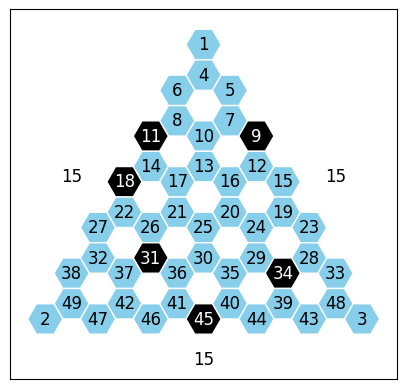

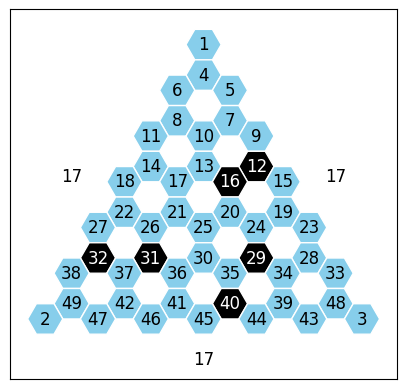

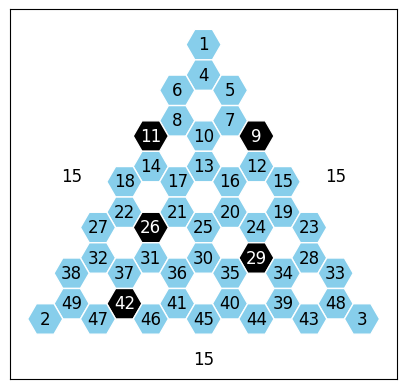

In [87]:
from hex_maze_utils import plot_hex_maze

# Maze 0
maze = df['barriers'][0]
plot_hex_maze(maze, show_choice_points=False)

# Or maze 100
maze = df['barriers'][100]
plot_hex_maze(maze, show_choice_points=False)

# Or maze 1000
maze = df['barriers'][1000]
plot_hex_maze(maze, show_choice_points=False)